**GEO6361, semaine 12 : Réseaux de neurones artificiels** (RNA)

Prenons des données immobilières réelles (échantillonnées dans les années 1970... ) et essayons de construire un modèle de prédiction de prix median.

#**Exemple d'apprentissage automatique par RNA**

## **1. Exploration des données**

### **1.1 Importons les modules et les données requises pour cette section**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow import keras

In [ ]:
# https://www.kaggle.com/datasets/vikrishnan/boston-house-prices
# - CRIM per capita crime rate by town
# - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS proportion of non-retail business acres per town
# - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX nitric oxides concentration (parts per 10 million)
# - RM average number of rooms per dwelling
# - AGE proportion of owner-occupied units built prior to 1940
# - DIS weighted distances to five Boston employment centres
# - RAD index of accessibility to radial highways
# - TAX full-value property-tax rate per $10,000
# - PTRATIO pupil-teacher ratio by town
# - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT % lower status of the population
# - MEDV Median value of owner-occupied homes in $1000's

noms_colonnes = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("/content/housing.csv", header=None, delimiter=r"\s+", names = noms_colonnes)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Retirons la colonne B (voir https://github.com/scikit-learn/scikit-learn/issues/16155, https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8, https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)
df = df.drop('B', axis=1)

In [ ]:
len(df)

506

### **1.2 Explorons les données**

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [ ]:
# Vérifions le nombre de données manquantes :
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

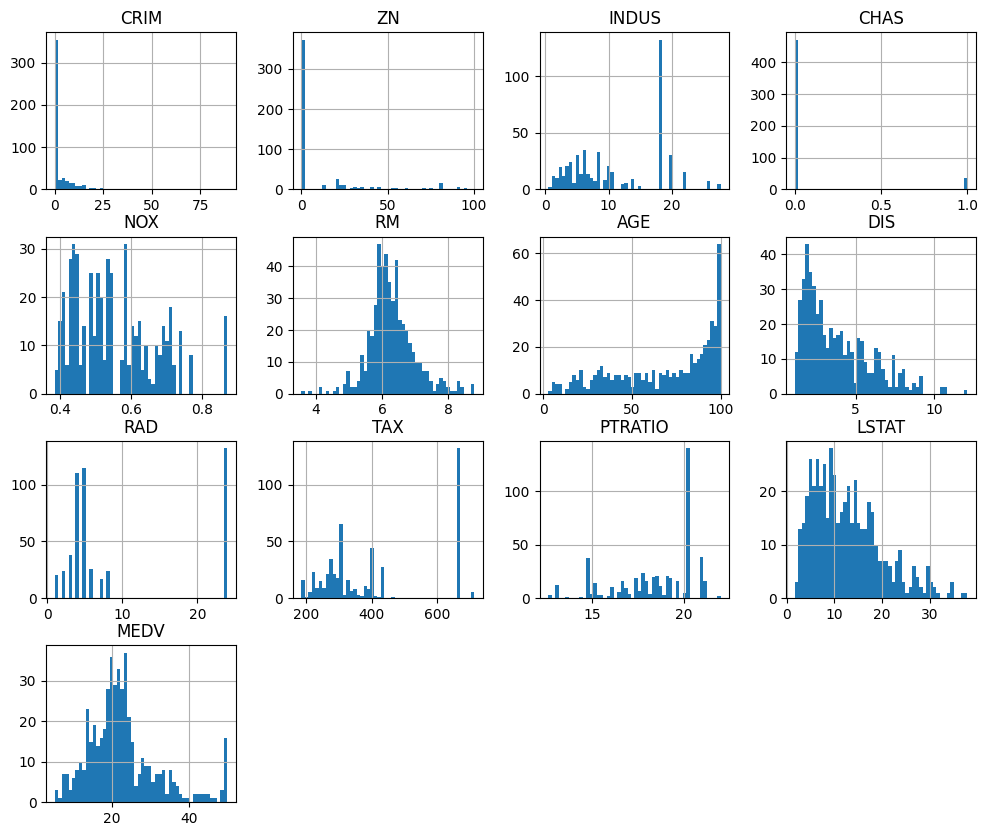

In [ ]:
# Distribution des variables
df.hist(
    bins=50,
    figsize=(12,10)
    )

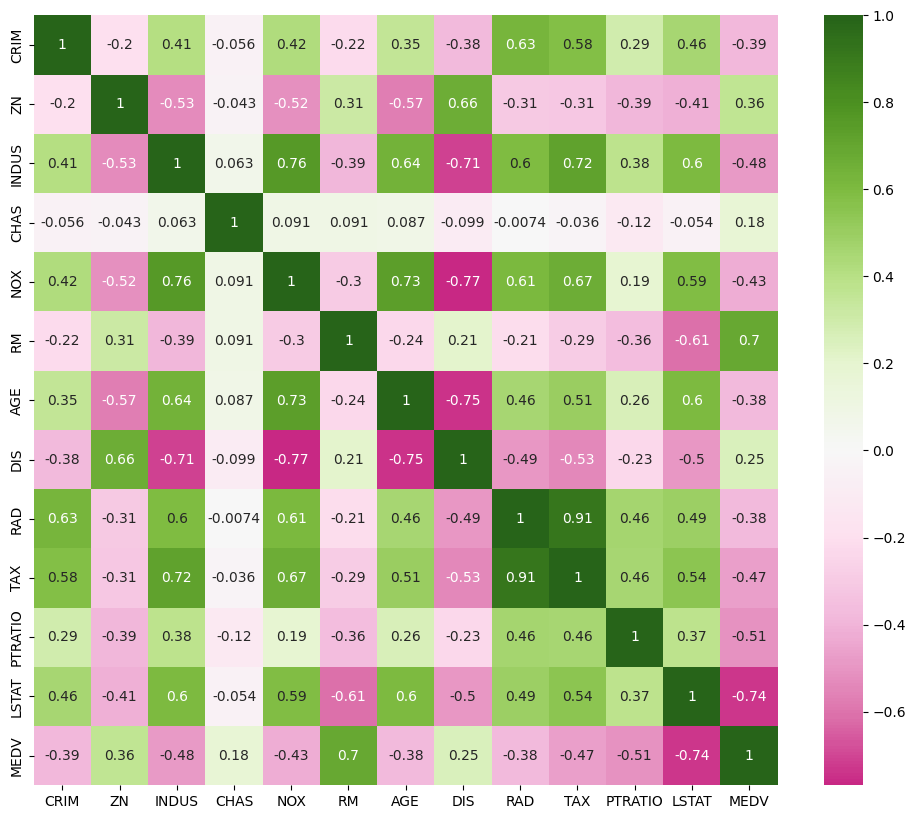

In [ ]:
# Corrélogramme
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='PiYG',
    center=0
    )
plt.show()

Préparation des listes X et y (que je mets dans des arrays NumPy)

In [ ]:
# "X" est une array 2D contenant les valeurs des variables qui pourraient prédire le prix médians
X = df.drop(['MEDV'], axis = 1).values # Nous retirons la variable à prédire, et transformons le DF en array NumPy avec .values

In [ ]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        7.8800e+00]])

In [ ]:
# "y" est une array 1D contenant les valeurs des prix médians
y = df['MEDV'].values

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## **2. Contruction du modèle**

### **2.1 Séparation des données d’entrainement et des données de test**

In [ ]:
# On importe la méthode de SKlearn qui sépare aléatoirement notre jeu de données entre les données d'entrainement et les données de test
from sklearn.model_selection import train_test_split

In [ ]:
# On sépare le jeu de données de manière à garder 2/3 des données pour l'entrainement du modèle, et 1/3 pour le test du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### **2.2 Étape facultative (mais qui permet de faire converger plus rapidement le modèle) : normaliser les données**

In [ ]:
# Nous créons une couche qui normalise les données selon les moyennes et écarts-types des variables (de manière à ce que la moyenne des variables soit toujours égale à 0 et l'écart type égal à 1) :
norm_layer = keras.layers.Normalization()
norm_layer.adapt(X)

### **2.3 Construction de l’architecture du réseau de neurones**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Création d'un modèle vide de type séquentiel (dans lequel les calculs se propagnent de gauche à droite)



In [ ]:
model = Sequential()

Ajouter la couche d'entrée normalisée

In [ ]:
model.add(norm_layer)

Création des couches et de leurs fonctions d'activation : https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8, https://riptutorial.com/fr/machine-learning/example/31624/fonctions-d-activation

In [ ]:
# Ajout d'une première couche cachée
# Le nombre de neurones par couche est à déterminer en fonction du nombre de caractéristiques d'entrée, mais c'est également en partie un exercice d'essai/erreur : https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3
# Comme fonction d'activation, on utilise une des fonctions d'activation les plus simples et les plus communes : ReLU, qui est une unité de rectificateur linéraire (f(x)=0 quand x<0 et f(x)=x quand x>0.)
# Ici, on choisit d'avoir 9 neurones (les données d'entrée ont 12 variables)
model.add(Dense(9, input_dim=12, activation='relu'))

# Si on souhaite ajouter d'autres couches cachées (l'ordre des couches est déterminée par l'ordre de l'appel à la méthode "add")
model.add(Dense(9, activation='relu'))
# model.add(Dense(9,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Création du neurone "résultat". On a besoin d'un seul résultat (température), on ne lui donne donc qu'un neurone

In [ ]:
model.add(Dense(1, activation='linear'))

On compile le réseau avec un optimiseur et une méthode de calcul d'erreur

In [ ]:
model.compile(
    optimizer='Adam', # Fonction de gradient de descente permettant d'optimiser, une itération après l'autre, les poids et biais du réseau (pour en savoir plus https://www.geeksforgeeks.org/intuition-of-adam-optimizer/)
    loss='mse' # "Mean Square Error" calcule l'erreur moyenne quadratique entre les données d'entrée et les résultats connus
    )

### **2.4 Optimisation du réseau (calcul des poids et des biais)**

In [ ]:
# Entraînement du modèle
model.fit(
    X_train, # Variables d'entrée
    y_train, # Résultats correspondant
    epochs=500, # Nombre d'époques
    verbose=1
    )

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 552.0613
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 571.7575 
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 541.4274 
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 520.4955 
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534.3248 
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 502.0065  
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 521.6058  
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 506.9991 
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 472.0052 
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 458.3992 
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 403.6193 
Epoch 12/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 423.5139  
Epoch 13/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 390.1338 
Epoch 14/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323.5255 
Epoch 15/500
11/11 ━━━━━━━━

**Plus sophistiqué : arrêter l'optimisation automatiquement quand le modèle rique de se sur-spécialiser ("overfitting")**

In [ ]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50)
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=10000,
#     verbose=1,
#     validation_split = 0.1,
#     callbacks = early_stop
#     )

# # Afficher une figure montrant l'évolution de l'optimisation :
# df_loss = pd.DataFrame(history.history)
# df_loss['epoch'] = history.epoch

# plt.figure()
# plt.xlabel('Epoch')
# plt.ylabel('Erreur moyenne quadratique (en milliers de $^2$)')
# plt.plot(df_loss['epoch'], df_loss['loss'], label='Erreur données d\'entrainement')
# plt.plot(df_loss['epoch'], df_loss['val_loss'], label = 'Erreur données de test')
# plt.legend()

Affichage de l'historique de l'optimisation

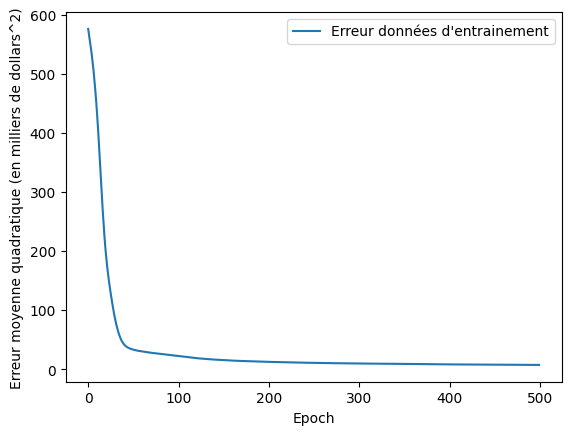

In [ ]:
# Visualisons l'évolution de l'optimisation du modèle
df_loss = pd.DataFrame(model.history.history)
df_loss['epoch'] = model.history.epoch
# loss_df.plot()


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Erreur moyenne quadratique (en milliers de dollars^2)')
plt.plot(df_loss['epoch'], df_loss['loss'], label='Erreur données d\'entrainement')
plt.legend()
# plt.ylim([0,50])

## **3. Évaluation de la qualité du modèle**

Prédiction des prix médians avec les données de test (et non les données d'entrainement)

In [ ]:
# Utilisation du modèle pour prédire des valeurs de sortie
test_predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# On construit un tableau pour comparer les résultats de prédiction et les résultats effectivement observés
test_predictions = pd.Series(test_predictions.reshape(len(X_test,)))
pred_df = pd.DataFrame(y_test,columns=['Test y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test y','Model predictions']

In [ ]:
pred_df

,Test y,Model predictions
0,24.4,25.384747
1,29.6,25.483540
2,24.3,21.389561
3,17.2,19.961666
4,9.6,10.765327
...,...,...
162,13.2,19.152029
163,19.6,19.264910
164,28.2,30.196804
165,36.2,25.872992


Graphique des données observées (Test y) par rapport aux données prédites par le modèle :

<Axes: xlabel='Test y', ylabel='Model predictions'>

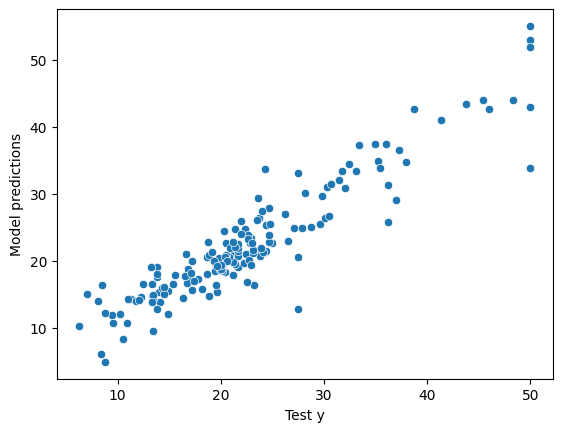

In [ ]:
sns.scatterplot(x='Test y',y='Model predictions',data=pred_df)

Importation de la fonction Sklearn pour calculer les erreurs

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Nous voici avec une erreur moyenne absolue de :

In [ ]:
mean_absolute_error(pred_df['Test y'],pred_df['Model predictions'])

2.4879044121610905

À comparer avec la moyenne des prix (pour se faire une idée de la qualité du modèle)

In [ ]:
df['MEDV'].mean()

22.532806324110677

Le modèle n'est donc pas TRÈS bon, mais 1) on a appris des choses, et 2) on peut modifier la structure du RNA pour essayer de l'améliorer :)

Pour utiliser le modèle avec de nouvelles données, on passe une liste des valeurs des 12 variables d'entrée (dans notre cas, 5 enregistrements contenant chacun 12 variables) :

In [ ]:
print(y_test[:5])

print(model.predict(X_test[:5]))

[24.4 29.6 24.3 17.2  9.6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[25.384747]
 [25.48354 ]
 [21.38956 ]
 [19.961666]
 [10.765327]]


Pour sauvegarder notre modèle :

In [ ]:
model.save('/content/modele_Boston.keras') # crée un fichier au format spécifique à Keras
# model.export('/content/modele_Boston') # crée un dossier, mais pas possible de le réimporter facilement dans Keras

Pour charger un modèle existant :

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('modele_Boston.keras')

In [ ]:
# liste_val = [........]
loaded_model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[25.384747],
       [25.48354 ],
       [21.38956 ],
       [19.961666],
       [10.765327]], dtype=float32)